In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [5]:
# reading the data out of the csv file
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
# check for missing values
df.isnull().values.any()

False

In [8]:
# shape of data
df.shape

(19735, 29)

In [9]:
# statistical summary
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [10]:
# check for duplicates
df.duplicated().sum()

0

<Axes: >

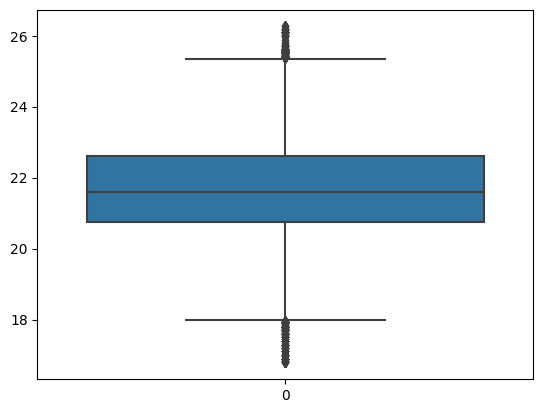

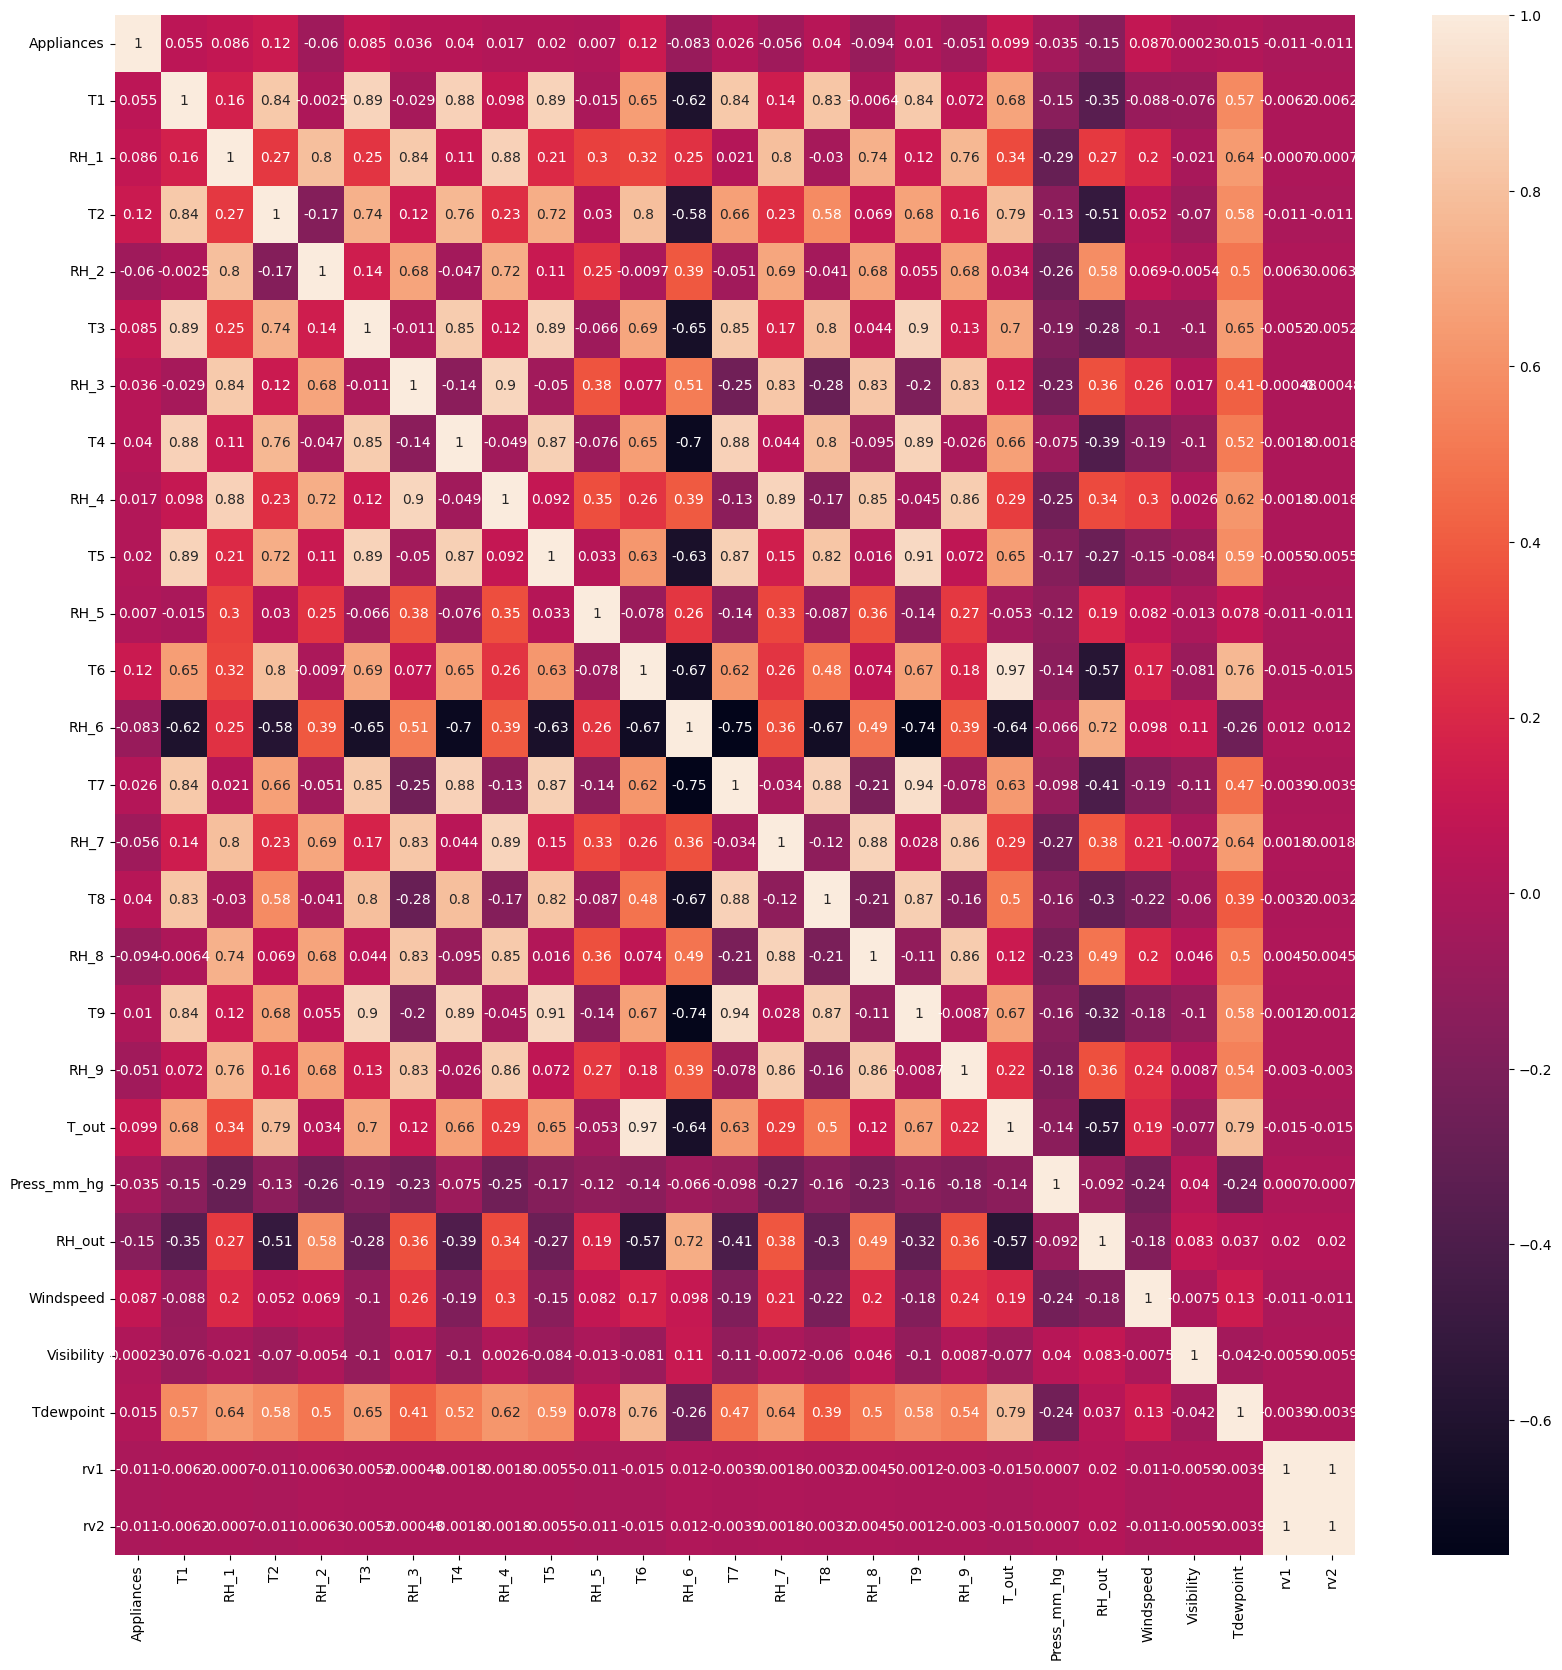

In [12]:
# drop date and lights columns
df.drop(columns=['date', 'lights'], inplace=True)

# check for outliers
sns.boxplot(df['T1'])

# check for correlation
df.corr()

# visualizing correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [13]:
# Scaling the data
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalized_df.drop(columns=['Appliances'])
target = normalized_df['Appliances']

In [14]:
# Reshaping the data
x= features_df['T2'].values.reshape(-1,1)
y = features_df['T6'].values.reshape(-1,1)
x,y

(array([[0.22534529],
        [0.22534529],
        [0.22534529],
        ...,
        [0.69265118],
        [0.67705355],
        [0.66617051]]),
 array([[0.3810702 ],
        [0.37544268],
        [0.36748654],
        ...,
        [0.86426042],
        [0.82952506],
        [0.78858002]]))

# Question 12.

In [15]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# fitting the model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# predicting the model
predicted_values = linear_model.predict(x_test)

# r2 score
r2 = r2_score(y_test, predicted_values)

# rounding up the r2 score
round(r2, 2)

0.64

# Question 13.

In [16]:
# splitting the data into train and test sets using the original dataset
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# fitting the model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# predicting the model
predicted_values = linear_model.predict(x_test)

# mean absolute error
mae = mean_absolute_error(y_test, predicted_values)

# rounding up the mean absolute error
round(mae, 2)

0.05

# Question 14.

In [17]:
# the Residual Sum of Squares (in two decimal places)
rss = np.sum(np.square(y_test - predicted_values))

# rounding up the rss
round(rss, 2)


45.35

# Question 15.

In [18]:


# the Root Mean Squared Error (in three decimal places)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# rounding up the rmse
round(rmse, 3)

0.088

# Question 16.

In [19]:
# the Coefficient of Determination (in two decimal places)
r2= r2_score(y_test, predicted_values)

# rounding up the r2 score
round(r2, 2)

0.15

#Question 17.

In [20]:
# a dataframe of the features and their weights
linear_model_weights = pd.DataFrame(linear_model.coef_, features_df.columns, columns=['weights'])

# sorting the dataframe in ascending order
linear_model_weights.sort_values(by='weights')

,weights
RH_2,-0.456698
T_out,-0.321860
T2,-0.236178
T9,-0.189941
RH_8,-0.157595
RH_out,-0.077671
RH_7,-0.044614
RH_9,-0.039800
T5,-0.015657
T1,-0.003281


# Question 18.

In [21]:
# splitting the data into train and test sets using the original dataset
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# fitting the model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

# predicting the model
predicted_values = ridge_reg.predict(x_test)

# mean absolute error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# rounding up the mean absolute error
round(rmse, 3)

0.088

# Question 19.

In [24]:
# dataframe of the features and their weights
lasso_weights = pd.DataFrame(lasso_reg.coef_, features_df.columns, columns=['weights'])

# sorting of the dataframe in ascending order
lasso_weights.sort_values(by='weights')

#features that have non-zero feature weights?
len(lasso_weights[lasso_weights['weights'] != 0])

4

# Question 20.

In [23]:
# splitting of the data into train and test sets using the original dataset
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# fitting of the model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# predicting the model
predicted_values = lasso_reg.predict(x_test)

# Question 20
# mean absolute error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# rounding up the mean absolute error
round(rmse, 3)

0.094